In [19]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('../fashnMnist/')
from fashnMnist.FashnMnist import FashnMnist
from fashnMnist.Preprocessor import Preprocessor


In [20]:
np.random.seed(20)

Load dataset
-------

In [21]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
preprocess=Preprocessor(normalization=True)
x_trainNorm, y_trainNorm, x_testNorm, y_testNorm=preprocess.Process_Fashon_mnistDataSet(x_train, y_train, x_test, y_test)


In [22]:

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']



In [23]:
#import wandb
#user = "kankan-jana"
#project = "cs6910_assignment1"

#wandb.login()
#wandb.init(entity=user, project=project)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objects as go
def plotGraph(msenl,crossnl,msel,crossl,title):
    xpoints = list(i+1 for i in range(len(msenl)))
    ypoints =list(msenl)

    plt.plot(xpoints, ypoints,color='red', linewidth=2, label="mse_tanh")

    xpoints = list(i+1 for i in range(len(crossnl)))
    ypoints =list(crossnl)

    plt.plot(xpoints, ypoints,color='green', linewidth=2,   label="cross_tanh")
    
    
    
    xpoints = list(i+1 for i in range(len(msel)))
    ypoints =list(msel)

    plt.plot(xpoints, ypoints,color='blue', linewidth=2, label="mse_relu")

    xpoints = list(i+1 for i in range(len(crossl)))
    ypoints =list(crossl)

    plt.plot(xpoints, ypoints,color='brown', linewidth=2,   label="cross_relu")
    plt.xlabel("step")
    plt.legend()
    plt.ylabel("accurecy")
    plt.title(title)
    plt.show()
    #wandb.log({"chart": wandb.Image(plt)})
    
   
    #wandb.log({"chart": plt})
    


Run MGD optimizer with mse and cross entropy loss
-------

In [39]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='mse',lr=.1,epochs =3,batch=32\
                   ,weight_decay=0.01,layer1_size=20,optimizer='adam',activation='tanh')
network.train()
msenl,mserunlossmgd=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='cross',lr=.1,epochs =3,\
                   batch=32,weight_decay=0.01,layer1_size=20,optimizer='adam',activation='tanh')
network.train()
crossnl,crossrunlossmgdtanh=network.TrainingStatistics()

MSE
Starting Adam
.....................................
 steps=3/3 , Accuraacy =79.76 ,Loss=0.0 
Completed
.....................................
ENTROPY
Starting Adam
.....................................
 steps=3/3 , Accuraacy =74.33 ,Loss=0.76101 
Completed
.....................................


In [43]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='mse',lr=.1,epochs =3,batch=100\
                   ,weight_decay=0.000001,layer1_size=20,optimizer='adam',activation='relu')
network.train()
msel,mserunlossmgd=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='cross',lr=.1,epochs =3,\
                   batch=100,weight_decay=0.000001,layer1_size=10,optimizer='adam',activation='relu')
network.train()
crossl,crossrunlossmgdrelu=network.TrainingStatistics()

MSE
Starting Adam
.....................................
 steps=3/3 , Accuraacy =10.0 ,Loss=0.0 
Completed
.....................................
ENTROPY
Starting Adam
.....................................


C:\Users\cseka\deepLearnAssignment1\final\kj\fashnMnist\Activations.py:66: RuntimeWarning:

overflow encountered in exp

C:\Users\cseka\deepLearnAssignment1\final\kj\fashnMnist\Activations.py:69: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\cseka\deepLearnAssignment1\final\kj\fashnMnist\Activations.py:46: RuntimeWarning:

invalid value encountered in less

C:\Users\cseka\deepLearnAssignment1\final\kj\fashnMnist\Activations.py:49: RuntimeWarning:

invalid value encountered in greater



 steps=3/3 , Accuraacy =10.0 ,Loss=nan 
Completed
.....................................


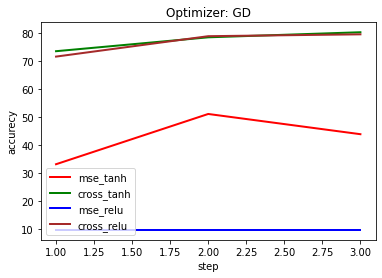

In [30]:
plotGraph(msenl,crossnl,msel,crossl,"Optimizer: GD")

Run RMS Prop optimizer with mse and cross entropy loss
-------

In [ ]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='mse',lr=.1,epochs =3,\
                   batch=32,weight_decay=0.1,layer1_size=20,optimizer='rms',activation='tanh')
network.train()
mserunacc,mserunloss=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='cross',lr=.1,epochs =3,\
                   batch=32,weight_decay=0.1,layer1_size=20,optimizer='rms',activation='tanh')
network.train()
crossrunacc,crossrunloss=network.TrainingStatistics()

In [ ]:
    
plotGraph(mserunacc,crossrunacc)

Run NAG optimizer with mse and cross entropy loss
-------

In [ ]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='mse',lr=.1,\
                   epochs =5,batch=32,layer1_size=32,optimizer='nag',activation='tanh')
network.train()
mserunacc,mserunloss=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='cross',lr=.1,\
                   epochs =5,batch=32,weight_decay=0.1,layer1_size=32,optimizer='nag',activation='tanh')
network.train()
crossrunacc,crossrunloss=network.TrainingStatistics()

In [ ]:
    
plotGraph(mserunacc,crossrunacc)

Run NAdam optimizer with mse and cross entropy loss
-------

In [ ]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='mse',lr=.1,\
                   epochs =5,batch=100,weight_decay=0.1,layer1_size=20,optimizer='adam',activation='tanh')
network.train()
mserunacc,mserunloss=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=False ,lossfunction='cross',lr=.1,\
                   epochs =5,batch=100,weight_decay=0.1,layer1_size=20,optimizer='adam',activation='tanh')
network.train()
crossrunacc,crossrunloss=network.TrainingStatistics()

In [ ]:
plotGraph(mserunacc,crossrunacc)

Run GD optimizer with mse and cross entropy loss
-------

In [ ]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='mse',\
                   lr=.1,epochs =5,batch=100,,layer1_size=20,optimizer='gd',activation='tanh')
network.train()
mserunacc,mserunloss=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='cross',lr=.1,epochs =5,batch=100,\
                   weight_decay=0.1,layer1_size=20,optimizer='gd',activation='tanh')
network.train()
crossrunacc,crossrunloss=network.TrainingStatistics()

In [ ]:
print('MSE')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='mse',lr=.1,epochs =5,batch=100,\
                   weight_decay=0.1,layer1_size=20,optimizer='adam',activation='relu')
network.train()
mserunacc,mserunloss=network.TrainingStatistics()
print('ENTROPY')
network=FashnMnist(x=x_trainNorm,y=y_trainNorm,runlog=True ,lossfunction='cross',lr=.1,epochs =5,\
                   batch=100,weight_decay=0.1,layer1_size=20,optimizer='adam',activation='relu')
network.train()
crossrunacc,crossrunloss=network.TrainingStatistics()

In [ ]:
plotGraph(mserunacc,crossrunacc)